In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
#导入必要的库

In [6]:
#设置LSTM、GRU的时间窗
window=1
#读取数据
df1=pd.read_csv('data.csv') 
df1=df1.iloc[:,2:]
df1.tail()

,open,low,close,high
26272,7.1042,7.1042,7.1048,7.1055
26273,7.1047,7.1038,7.1038,7.1047
26274,7.1039,7.1039,7.1046,7.1047
26275,7.1048,7.1043,7.1045,7.1049
26276,7.1049,7.1049,7.1057,7.1057


In [7]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
input_size=len(df.iloc[1,:])

In [8]:
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度5+1
result = []
for index in range(len(data) - sequence_length):#循环170-5次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到161个样本，样本形式为6天*3特征
row = round(0.9 * result.shape[0])#划分训练集测试集
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]
#reshape成 5天*3特征
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

E:\anoconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [20]:
#建立GRU模型 训练
d = 0.01
model = Sequential()
model.add(LSTM(8, input_shape=(window, input_size), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(4,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch = 100, batch_size = 256) #训练模型1000次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  import sys
E:\anoconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/100
23648/23648 [==============================] - 1s 30us/step - loss: 0.2530 - accuracy: 4.2287e-05
Epoch 2/100
23648/23648 [==============================] - 0s 10us/step - loss: 0.0631 - accuracy: 8.4574e-05
Epoch 3/100
23648/23648 [==============================] - 0s 11us/step - loss: 0.0135 - accuracy: 8.4574e-05
Epoch 4/100
23648/23648 [==============================] - 0s 10us/step - loss: 0.0055 - accuracy: 8.4574e-05
Epoch 5/100
23648/23648 [==============================] - 0s 11us/step - loss: 0.0019 - accuracy: 8.4574e-05
Epoch 6/100
23648/23648 [==============================] - 0s 10us/step - loss: 0.0012 - accuracy: 8.4574e-05
Epoch 7/100
23648/23648 [==============================] - 0s 11us/step - loss: 8.9185e-04 - accuracy: 8.4574e-05
Epoch 8/100
23648/23648 [==============================] - 0s 10us/step - loss: 7.0464e-04 - accuracy: 8.4574e-05
Epoch 9/100
23648/23648 [==============================] - 0s 10us/step - loss: 5.8420e-04 - accuracy: 8.4574e-0

23648/23648 [==============================] - 0s 11us/step - loss: 1.1746e-04 - accuracy: 8.4574e-05
Epoch 71/100
23648/23648 [==============================] - 0s 9us/step - loss: 1.2612e-04 - accuracy: 8.4574e-05
Epoch 72/100
23648/23648 [==============================] - 0s 8us/step - loss: 1.2413e-04 - accuracy: 8.4574e-05
Epoch 73/100
23648/23648 [==============================] - 0s 11us/step - loss: 1.2215e-04 - accuracy: 8.4574e-05
Epoch 74/100
23648/23648 [==============================] - 0s 8us/step - loss: 1.1920e-04 - accuracy: 8.4574e-05
Epoch 75/100
23648/23648 [==============================] - 0s 8us/step - loss: 1.2291e-04 - accuracy: 8.4574e-05
Epoch 76/100
23648/23648 [==============================] - 0s 8us/step - loss: 1.2086e-04 - accuracy: 8.4574e-05
Epoch 77/100
23648/23648 [==============================] - 0s 9us/step - loss: 1.1713e-04 - accuracy: 8.4574e-05
Epoch 78/100
23648/23648 [==============================] - 0s 9us/step - loss: 1.1596e-04 - accura

In [21]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]

Text(0.5, 1.0, 'Train Data')

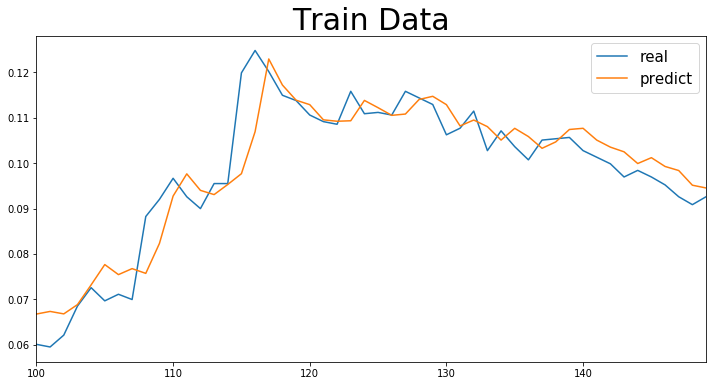

In [22]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [23]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

Text(0.5, 1.0, 'Test Data')

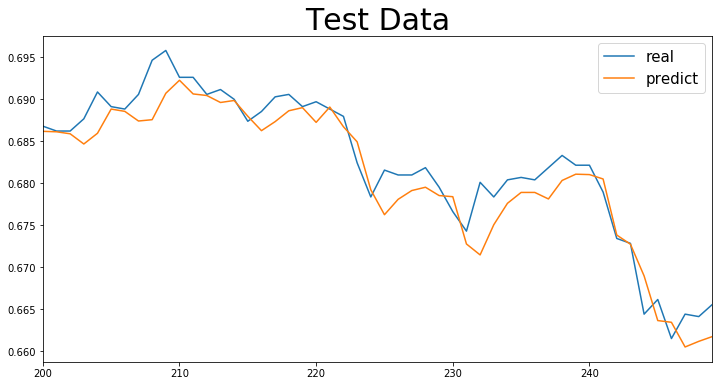

In [24]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [25]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)
print('训练时间（秒）:',54.56)

训练集上的MAE/MSE/MAPE
0.0033596855014726697
3.189097468742105e-05
1.1362993385526212
测试集上的MAE/MSE/MAPE
0.002652019219942002
1.963586780608283e-05
0.3745746310563969
预测涨跌正确: 0.4862909367859863
训练时间（秒）: 54.56
